#  Bernstein-Vazirani

In [96]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

from qiskit_aer import *
from qiskit.providers.aer import *
from qiskit_aer.noise import NoiseModel

## Put your inputs below


In [97]:

# provide your inputs here

number_of_qubits = 4
a = '0011' #string data type



## Code starts here

In [98]:
# Load provider from IBM credentials 
provider = IBMQ.load_account()


ibmqfactory.load_account:WARNING:2022-11-07 02:55:24,437: Credentials are already in use. The existing account in the session will be replaced.


In [99]:
# bv oracle function
def bv_oracle(n:int, s:str):
    _circuit_oracle = QuantumCircuit(n+1)
    #reverse the bit string because qiskit uses inverse endianness
    s = s[::-1]

    # apply cx gate using the qubits for which the bit position in s is 1 as control and target qubit is the n+1 qubit
    for _bit_position in range(n):
        if(s[_bit_position] == '1'):
            _circuit_oracle.cx(_bit_position, n)
        else:
            _circuit_oracle.i(_bit_position)

    # convert to gate
    _gate_oracle = _circuit_oracle.to_gate()
    s = s[::-1]
    _gate_oracle.name = "Oracle\n s: "+str(s)

    #return gate
    return _gate_oracle




In [100]:
# circuit function for BV algorithm
def bv_circuit(n:int, s:str):
    # define a n+1 qubit circuit with n classical bits
    _circuit_output = QuantumCircuit(n+1,n)

    #initialize the inputs
    for _qubit in range(n+1):
        _circuit_output.reset(_qubit)
    _circuit_output.x(n)

    _circuit_output.barrier()

    #apply hadamard gates to the n inputs
    for _qubit in range(n+1):
        _circuit_output.h(_qubit)

    #create the circuit for oracle
    _gate_oracle = bv_oracle(n,s)

    _circuit_output.append(_gate_oracle,range(n+1))

    #apply hadamard gates again
    for _qubit in range(n):
        _circuit_output.h(_qubit)

    _circuit_output.barrier()

    #measure the qubits
    for _bit in range(n):
        _qubit = _bit
        _circuit_output.measure(_qubit,_bit)

    #return the output circuit
    return _circuit_output





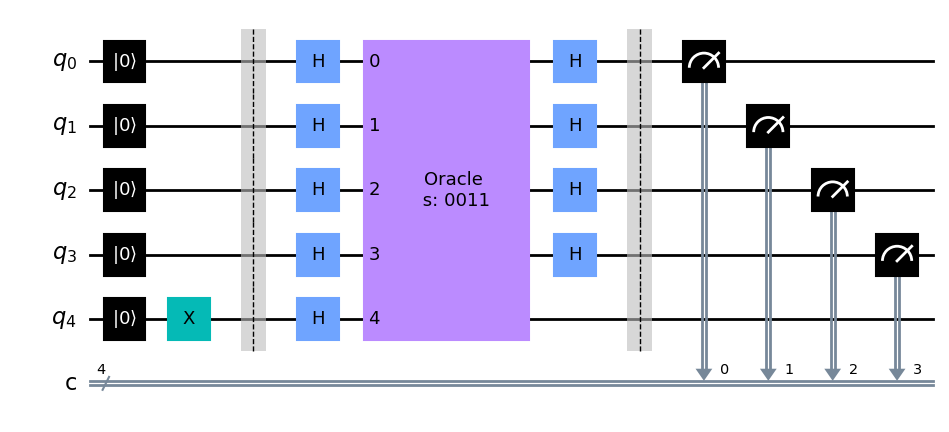

In [101]:
# Test environemnt

test_circuit = bv_circuit(number_of_qubits, a)

#draw the test circuit

test_circuit.draw('mpl')

noisless simulation time taken: 0.0030095577239990234


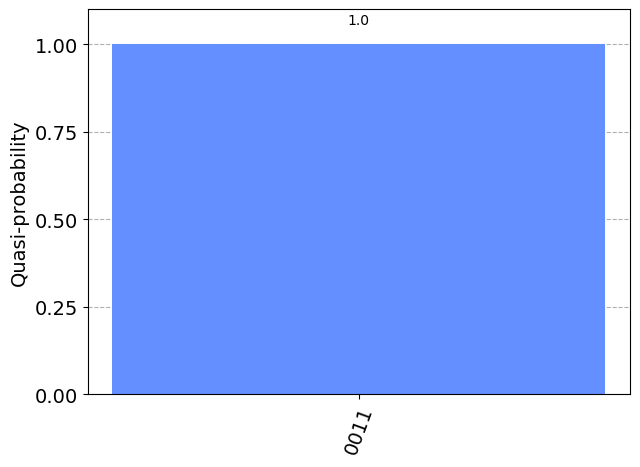

In [102]:
# noiseless simulation

#set backend
backend_sim = Aer.get_backend('qasm_simulator')
#transpile
job_sim = backend_sim.run(transpile(test_circuit, backend_sim), shots=1024)
#get result
result_sim = job_sim.result()
#get counts
counts = result_sim.get_counts(test_circuit)
#print execution time
print("noisless simulation time taken: "+ str(result_sim.time_taken))
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#plot histogram
plot_histogram(counts)

Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067148 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067183 > 1.066667). Truncating to maximum value.


noisy simulation time taken: 0.03560304641723633


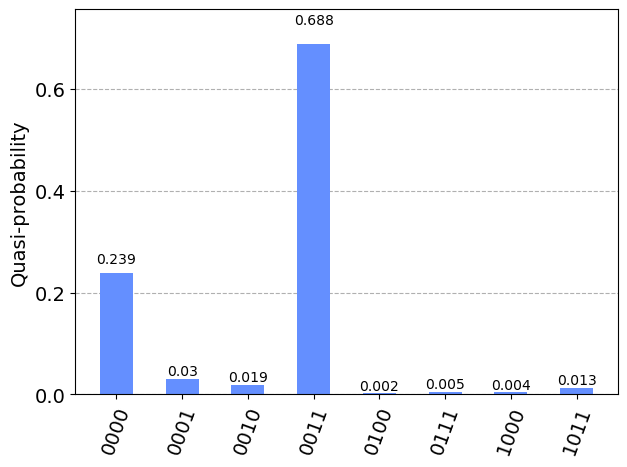

In [103]:
#noisy simulation
# set backend model with belem
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_belem'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)

noisy simulation time taken: 0.024231433868408203


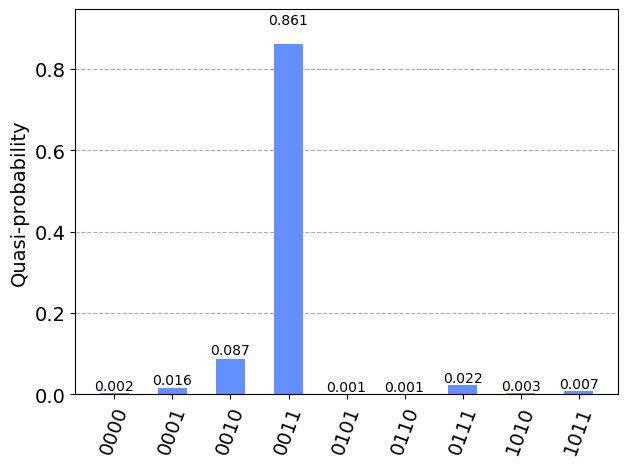

In [104]:
#noisy simulation
# set backend model with manila
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_manila'))
#define noise of basis gates
basis_gates = noise_model.basis_gates
#execute on backend
result = execute(test_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

#get counts
counts = result.get_counts(0)
total = sum(counts.values())
#convert count to probability
counts = {key: value / total for key, value in counts.items()}
#print execution time
print("noisy simulation time taken: "+ str(result.time_taken))
#plot histogram
plot_histogram(counts)